### Aim: Find the outlier using trimming and capping method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("placement.csv")
df.rename(columns = {'placement_exam_marks':'marks'}, inplace = True)
df.sample(5)

,cgpa,marks,placed
455,6.92,43,0
527,7.72,37,0
911,7.45,36,1
269,6.47,16,0
420,7.59,49,0


<AxesSubplot:xlabel='marks', ylabel='Density'>

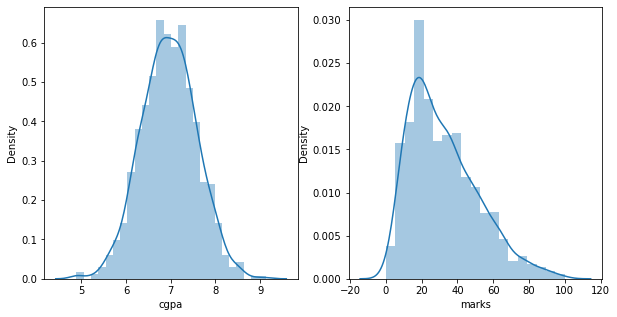

In [3]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["cgpa"])

plt.subplot(1,2,2)
sns.distplot(df["marks"])

In [4]:
df["marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: marks, dtype: float64

<AxesSubplot:xlabel='marks'>

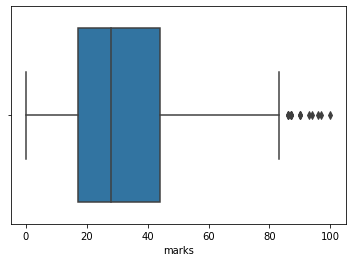

In [5]:
sns.boxplot(df["marks"])

In [6]:
#finding boundries values
print("Highest Boundary value for CGPA:",df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest Boundary value for CGPA:",df["cgpa"].mean() - 3*df["cgpa"].std())

Highest Boundary value for CGPA: 8.808933625397177
Lowest Boundary value for CGPA: 5.113546374602842


In [7]:
#finding outliers
df[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,marks,placed
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


### Trimming

In [8]:
df.shape

(1000, 3)

In [9]:
data = df[(df["cgpa"]<8.80) & (df["cgpa"]>5.11)]
data.sample(5)

,cgpa,marks,placed
202,6.51,48,1
564,7.17,34,1
619,6.81,43,0
290,8.38,87,0
964,8.09,54,1


In [10]:
data.shape

(995, 3)

### z-score
z = xi - x_mean/S.D

In [11]:
df["cgpa_score"] = (df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std()

In [12]:
df.head()

,cgpa,marks,placed,cgpa_score
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371


In [13]:
df["cgpa_score"].describe()

count    1.000000e+03
mean    -1.600275e-14
std      1.000000e+00
min     -3.362960e+00
25%     -6.677081e-01
50%     -2.013321e-03
75%      6.636815e-01
max      3.505062e+00
Name: cgpa_score, dtype: float64

In [14]:
df[df["cgpa_score"] > 3]

,cgpa,marks,placed,cgpa_score
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062


In [15]:
df[df["cgpa_score"] < -3]

,cgpa,marks,placed,cgpa_score
485,4.92,44,1,-3.314251
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [25]:
df2 = df[(df["cgpa_score"] > 3) | (df["cgpa_score"] < -3)]
df2

,cgpa,marks,placed,cgpa_score,cgpa_cap
485,4.92,44,1,-3.314251,5.113546
995,8.87,44,1,3.099150,8.808934
996,9.12,65,1,3.505062,8.808934
997,4.89,34,0,-3.362960,5.113546
999,4.90,10,1,-3.346724,5.113546


In [27]:
df1 = df[(df["cgpa_score"] < 3) & (df["cgpa_score"] > -3)]
df1.sample(5)

,cgpa,marks,placed,cgpa_score,cgpa_cap
326,7.54,13,0,0.939701,7.54
608,7.33,16,1,0.598736,7.33
544,7.11,14,1,0.241534,7.11
439,6.67,10,1,-0.472871,6.67
903,7.56,28,1,0.972174,7.56


In [17]:
df1.shape

(995, 4)

### Capping

In [18]:
upper_limit = df["cgpa"].mean() + 3*df["cgpa"].std()
lower_limit = df["cgpa"].mean() - 3*df["cgpa"].std()
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 8.808933625397177
Lower Limit: 5.113546374602842


In [19]:
#np.where(x,y,z)
df["cgpa_cap"] = np.where(df["cgpa"]>upper_limit,upper_limit,
                 np.where(df["cgpa"]<lower_limit,lower_limit,df["cgpa"]))

In [20]:
df["cgpa_cap"]

0      7.190000
1      7.460000
2      7.540000
3      6.420000
4      7.230000
         ...   
995    8.808934
996    8.808934
997    5.113546
998    8.620000
999    5.113546
Name: cgpa_cap, Length: 1000, dtype: float64

In [21]:
df.describe()

,cgpa,marks,placed,cgpa_score,cgpa_cap
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,6.961240,32.225000,0.489000,-1.600275e-14,6.961499
std,0.615898,19.130822,0.500129,1.000000e+00,0.612688
min,4.890000,0.000000,0.000000,-3.362960e+00,5.113546
25%,6.550000,17.000000,0.000000,-6.677081e-01,6.550000
50%,6.960000,28.000000,0.000000,-2.013321e-03,6.960000
75%,7.370000,44.000000,1.000000,6.636815e-01,7.370000
max,9.120000,100.000000,1.000000,3.505062e+00,8.808934


In [28]:
df["marks"].skew()

0.8356419499466834

In [34]:
quartile_25 = df["marks"].quantile(0.25)
quartile_25

17.0

In [35]:
quartile_75 = df["marks"].quantile(0.75)
quartile_75

44.0

In [36]:
iqr = quartile_75 - quartile_25
iqr

27.0

In [37]:
upper_limit = quartile_75 + 1.5*iqr
upper_limit

84.5

In [38]:
lower_limit = quartile_25 - 1.5*iqr
lower_limit

-23.5

In [49]:
df[df["marks"] > upper_limit]

,cgpa,marks,placed,cgpa_score,cgpa_cap
9,7.75,94,1,1.280667,7.75
40,6.60,86,1,-0.586526,6.60
61,7.51,86,0,0.890992,7.51
134,6.33,93,0,-1.024910,6.33
162,7.80,90,0,1.361849,7.80
283,7.09,87,0,0.209061,7.09
290,8.38,87,0,2.303564,8.38
311,6.97,87,1,0.014223,6.97
324,6.64,90,0,-0.521580,6.64
630,6.56,96,1,-0.651472,6.56


In [46]:
new_dff = df[df["marks"] < upper_limit]
new_dff

,cgpa,marks,placed,cgpa_score,cgpa_cap
0,7.19,26,1,0.371425,7.190000
1,7.46,38,1,0.809810,7.460000
2,7.54,40,1,0.939701,7.540000
3,6.42,8,1,-0.878782,6.420000
4,7.23,17,0,0.436371,7.230000
...,...,...,...,...,...
995,8.87,44,1,3.099150,8.808934
996,9.12,65,1,3.505062,8.808934
997,4.89,34,0,-3.362960,5.113546
998,8.62,46,1,2.693239,8.620000


In [47]:
new_dff.shape

(985, 5)

In [42]:
df[df["marks"] < lower_limit]

,cgpa,marks,placed,cgpa_score,cgpa_cap


### Trimming



<AxesSubplot:xlabel='marks'>

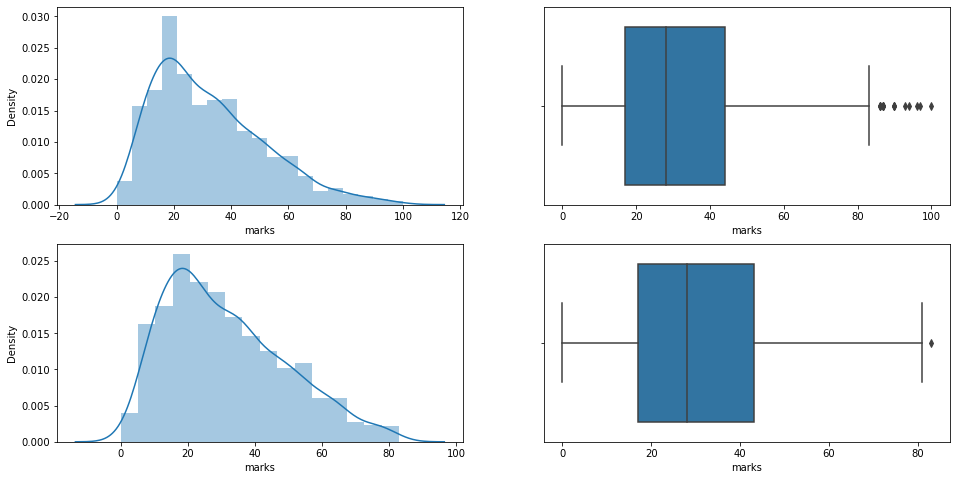

In [53]:
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["marks"])

plt.subplot(2,2,2)
sns.boxplot(df["marks"])

plt.subplot(2,2,3)
sns.distplot(new_dff["marks"])

plt.subplot(2,2,4)
sns.boxplot(new_dff["marks"])

In [54]:
new_df_cap = df.copy()

In [55]:
new_df_cap["marks"] = np.where(new_df_cap["marks"]>upper_limit,upper_limit,
                 np.where(new_df_cap["marks"]<lower_limit,lower_limit,new_df_cap["marks"]))

In [56]:
#np.where(condition,true.false)

In [58]:
new_df_cap["marks"]

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: marks, Length: 1000, dtype: float64

In [59]:
new_df_cap

,cgpa,marks,placed,cgpa_score,cgpa_cap
0,7.19,26.0,1,0.371425,7.190000
1,7.46,38.0,1,0.809810,7.460000
2,7.54,40.0,1,0.939701,7.540000
3,6.42,8.0,1,-0.878782,6.420000
4,7.23,17.0,0,0.436371,7.230000
...,...,...,...,...,...
995,8.87,44.0,1,3.099150,8.808934
996,9.12,65.0,1,3.505062,8.808934
997,4.89,34.0,0,-3.362960,5.113546
998,8.62,46.0,1,2.693239,8.620000


<AxesSubplot:xlabel='marks'>

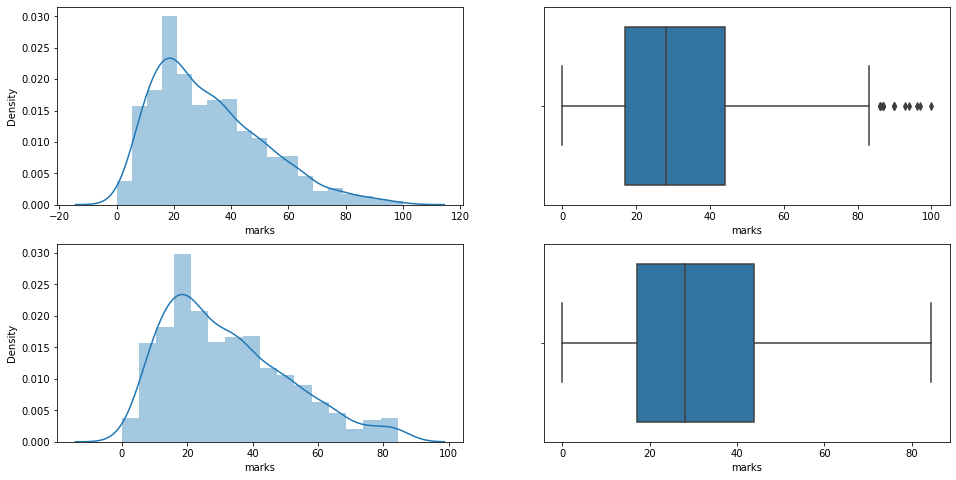

In [60]:
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["marks"])

plt.subplot(2,2,2)
sns.boxplot(df["marks"])

plt.subplot(2,2,3)
sns.distplot(new_df_cap["marks"])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap["marks"])